# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [342]:
# import Dependencies
import os as os
import csv as csv
import pandas as pd
import numpy as np
import scipy as sts
import json
import gmaps
import requests
import time
import random as rd
from matplotlib import pyplot as plt
from scipy.stats import linregress 
from pprint import pprint
from citipy import citipy
from config import (weather_api_key, g_key)


## Generate Cities List

In [343]:
# Create and empty list for name of cities to be stored
city_list = []

# Create loop so that the length of the list iterates to set number (number is set high due to duplicates)
while len(city_list) < 1300:
    
    #set random lat and long
    latitude = rd.uniform(-90.0,90.0)
    longitude = rd.uniform(-180.0,180.0)
    
    # Using citipy.nearest_city with lat and lng parameters to get city_name
    cities = citipy.nearest_city(latitude,longitude).city_name
    
    # Append returned cities to empty city_list
    city_list.append(cities)
    
# Get len of city_list to assure we have enough data
len(city_list)
#city_list

1300

In [344]:
# Create a dataframe from city_list. Check for unique number.
city_list_df = pd.DataFrame({"City": city_list})

# drop_duplicates
city_list_df = city_list_df.drop_duplicates()

#confirm unique count is over 500
city_list_df.describe()

,City
count,597
unique,597
top,hambantota
freq,1


In [345]:
# Add column names to dataframe
city_list_df['Lat.'] = ""
city_list_df['Lng.'] = ""
city_list_df['Max Temp.'] = ""
city_list_df['Humidity (%)'] = ""
city_list_df['Cloudiness (%)'] = ""
city_list_df['Wind Speed (mph)'] = ""
city_list_df["Country"] = ""
city_list_df["Date"] = ""

# Display dataframe
city_list_df.head()

,City,Lat.,Lng.,Max Temp.,Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,rikitea,,,,,,,,
1,posse,,,,,,,,
2,vardo,,,,,,,,
3,port keats,,,,,,,,
4,hilo,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [364]:
# openweathermap endpoint
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create list for data that will be retrived from API
city_name = []
lat = []
lng =[]
temp = []
humidity = []
cloudiness = []
wind_speed = []
country =[]
date = []

# Use for loop to iterate on each city from city_list
for city in city_list_df["City"]:
    
    # Wrap for loop in try statement so that we can use except statement for any city that has missing data
    try:
        # Create query_url with url , weather_api_key and city fro for loop
        query_url = f"{url}appid={weather_api_key}&q={city}"
        
        # Print results
        print(f"Retrieving Results for {city}")
        
        # Get response with request.get with query_url parameter and .json() 
        response = requests.get(query_url).json()    
        
           # Append results to set lists above by identifying location from response
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
    # except statement to address any cities with missing data so that the program continues and we can track such cities
    except (KeyError, IndexError):
        print("Missing field/results... skipping")
    print("---------------------------------------")
print("Data Retrival Completed")
print("---------------------------------")

Retrieving Results for rikitea
---------------------------------------
Retrieving Results for posse
---------------------------------------
Retrieving Results for vardo
---------------------------------------
Retrieving Results for port keats
---------------------------------------
Retrieving Results for hilo
---------------------------------------
Retrieving Results for new norfolk
---------------------------------------
Retrieving Results for chuy
---------------------------------------
Retrieving Results for vaini
---------------------------------------
Retrieving Results for caramay
---------------------------------------
Retrieving Results for mar del plata
---------------------------------------
Retrieving Results for alta floresta
---------------------------------------
Retrieving Results for albany
---------------------------------------
Retrieving Results for ulladulla
---------------------------------------
Retrieving Results for south venice
---------------------------------

---------------------------------------
Retrieving Results for betioky
---------------------------------------
Retrieving Results for mabaruma
---------------------------------------
Retrieving Results for havelock
---------------------------------------
Retrieving Results for beringovskiy
---------------------------------------
Retrieving Results for hoquiam
---------------------------------------
Retrieving Results for hithadhoo
---------------------------------------
Retrieving Results for bure
---------------------------------------
Retrieving Results for bakel
---------------------------------------
Retrieving Results for sitka
---------------------------------------
Retrieving Results for bilma
---------------------------------------
Retrieving Results for lorengau
---------------------------------------
Retrieving Results for carutapera
---------------------------------------
Retrieving Results for norsup
---------------------------------------
Retrieving Results for eirunepe
--

---------------------------------------
Retrieving Results for wabrzezno
---------------------------------------
Retrieving Results for abong mbang
---------------------------------------
Retrieving Results for clyde river
---------------------------------------
Retrieving Results for moshupa
---------------------------------------
Retrieving Results for rungata
Missing field/results... skipping
---------------------------------------
Retrieving Results for portland
---------------------------------------
Retrieving Results for waipawa
---------------------------------------
Retrieving Results for abu dhabi
---------------------------------------
Retrieving Results for qandala
---------------------------------------
Retrieving Results for belushya guba
Missing field/results... skipping
---------------------------------------
Retrieving Results for pisco
---------------------------------------
Retrieving Results for geraldton
---------------------------------------
Retrieving Results fo

---------------------------------------
Retrieving Results for longyearbyen
---------------------------------------
Retrieving Results for impfondo
---------------------------------------
Retrieving Results for nova olimpia
---------------------------------------
Retrieving Results for skourta
---------------------------------------
Retrieving Results for lanzhou
---------------------------------------
Retrieving Results for maple creek
---------------------------------------
Retrieving Results for port macquarie
---------------------------------------
Retrieving Results for pandan
---------------------------------------
Retrieving Results for hervey bay
---------------------------------------
Retrieving Results for cheuskiny
Missing field/results... skipping
---------------------------------------
Retrieving Results for sovetskiy
---------------------------------------
Retrieving Results for bilibino
---------------------------------------
Retrieving Results for iskateley
------------

---------------------------------------
Retrieving Results for luau
---------------------------------------
Retrieving Results for santa maria
---------------------------------------
Retrieving Results for asyut
---------------------------------------
Retrieving Results for cherskiy
---------------------------------------
Retrieving Results for toowoomba
---------------------------------------
Retrieving Results for griffith
---------------------------------------
Retrieving Results for dossor
---------------------------------------
Retrieving Results for queimadas
---------------------------------------
Retrieving Results for brae
---------------------------------------
Retrieving Results for nha trang
---------------------------------------
Retrieving Results for tual
---------------------------------------
Retrieving Results for burica
Missing field/results... skipping
---------------------------------------
Retrieving Results for louisbourg
Missing field/results... skipping
-------

---------------------------------------
Retrieving Results for huarmey
---------------------------------------
Retrieving Results for virginia beach
---------------------------------------
Retrieving Results for makurdi
---------------------------------------
Retrieving Results for souillac
---------------------------------------
Retrieving Results for samana
---------------------------------------
Retrieving Results for el sauce
---------------------------------------
Retrieving Results for umm durman
Missing field/results... skipping
---------------------------------------
Retrieving Results for simao
---------------------------------------
Retrieving Results for nicoya
---------------------------------------
Retrieving Results for prieska
---------------------------------------
Retrieving Results for bestobe
---------------------------------------
Retrieving Results for anori
---------------------------------------
Retrieving Results for sisimiut
------------------------------------

In [365]:
# Create dictionary with retrieved data for dataframe
city_dict = {
    "City": city_name,
    "Lat.": lat,
    "Lng.": lng,
    "Max Temp.": temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date
}
# Create dataframe
city_df = pd.DataFrame(city_dict)
#city_df["City"].describe()

# Display dataframe
city_df.head()

,City,Lat.,Lng.,Max Temp.,Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Rikitea,-23.12,-134.97,296.83,81,100,9.08,PF,1603082476
1,Posse,-14.09,-46.37,295.88,70,96,2.42,BR,1603082476
2,Vardø,70.37,31.11,271.15,79,20,5.10,NO,1603082476
3,Port Keats,-14.25,129.55,304.66,57,58,4.70,AU,1603082476
4,Hilo,19.73,-155.09,298.15,78,90,2.10,US,1603082477


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [366]:
# Export dataframe to csv
city_df.to_csv("../Output/city_data.csv")

In [377]:
# Display dataframe
city_df.head()

,City,Lat.,Lng.,Max Temp.,Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Rikitea,-23.12,-134.97,296.83,81,100,9.08,PF,1603082476
1,Posse,-14.09,-46.37,295.88,70,96,2.42,BR,1603082476
2,Vardø,70.37,31.11,271.15,79,20,5.10,NO,1603082476
3,Port Keats,-14.25,129.55,304.66,57,58,4.70,AU,1603082476
4,Hilo,19.73,-155.09,298.15,78,90,2.10,US,1603082477


In [368]:
city_df.describe()

,Lat.,Lng.,Max Temp.,Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.380312,19.913713,289.118548,72.443015,52.279412,3.575368,1.603083e+09
std,33.612827,90.198470,11.012960,20.772300,38.688146,2.732970,8.878874e+01
min,-54.800000,-179.170000,258.150000,10.000000,0.000000,0.180000,1.603082e+09
25%,-9.695000,-57.357500,281.150000,63.000000,10.750000,1.607500,1.603082e+09
50%,22.420000,23.460000,290.590000,77.000000,55.500000,2.920000,1.603083e+09
75%,47.485000,100.342500,298.150000,88.000000,90.000000,4.782500,1.603083e+09
max,78.220000,179.320000,312.150000,100.000000,100.000000,21.440000,1.603083e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [375]:
# create a series to check to seee if any cities are over 100% humidity
high_humidity = city_df["Humidity (%)"] > 100

# Get value_counts() to see if any cities came back True
high_humidity.value_counts()

False    544
Name: Humidity (%), dtype: int64

In [379]:
city_df.describe()

,Lat.,Lng.,Max Temp.,Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.380312,19.913713,289.118548,72.443015,52.279412,3.575368,1.603083e+09
std,33.612827,90.198470,11.012960,20.772300,38.688146,2.732970,8.878874e+01
min,-54.800000,-179.170000,258.150000,10.000000,0.000000,0.180000,1.603082e+09
25%,-9.695000,-57.357500,281.150000,63.000000,10.750000,1.607500,1.603082e+09
50%,22.420000,23.460000,290.590000,77.000000,55.500000,2.920000,1.603083e+09
75%,47.485000,100.342500,298.150000,88.000000,90.000000,4.782500,1.603083e+09
max,78.220000,179.320000,312.150000,100.000000,100.000000,21.440000,1.603083e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
# No cities over 100% humidity


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

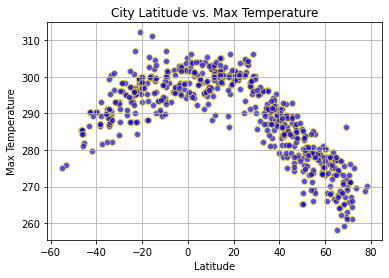

In [408]:
# Create scatter plot for latitude vs temp
plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="gold", alpha=0.70)

# Assign labels
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Add grid
plt.grid()

## Latitude vs. Humidity Plot

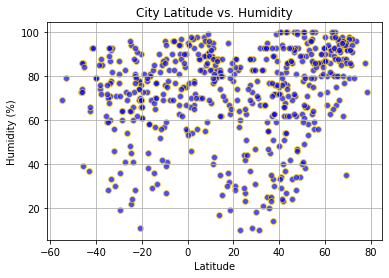

In [409]:
# Create scatter plot for lat vs humidity
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="gold", alpha=0.70)

# Assgin labels
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Add grid
plt.grid()

## Latitude vs. Cloudiness Plot

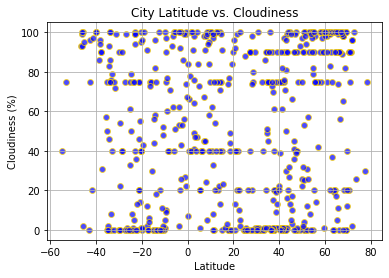

In [410]:
# Create scatter plot for lat vs cloudiness
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="gold", alpha=0.70)

# Assign labels
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Add grid
plt.grid()

## Latitude vs. Wind Speed Plot

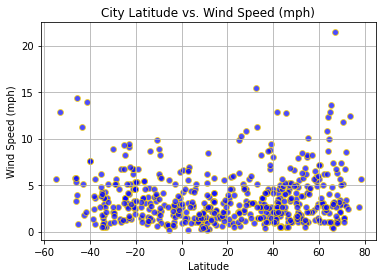

In [411]:
# Create scatter plot for lat vs. wind speed
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="gold", alpha=0.70)

# Assign labels
plt.title("City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Add grid
plt.grid()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


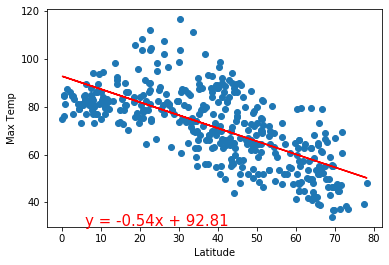

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


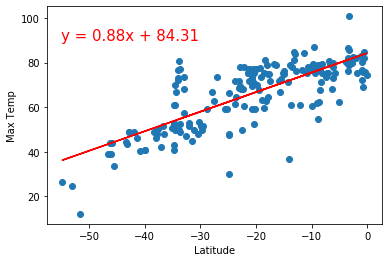

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


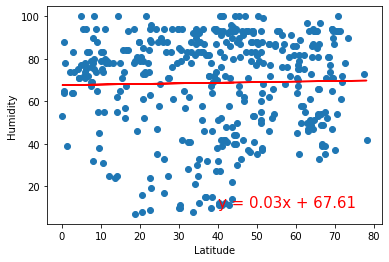

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


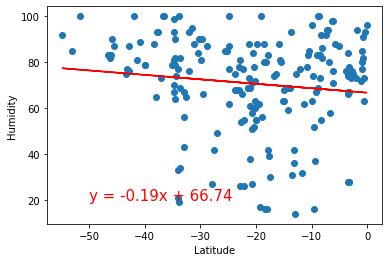

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


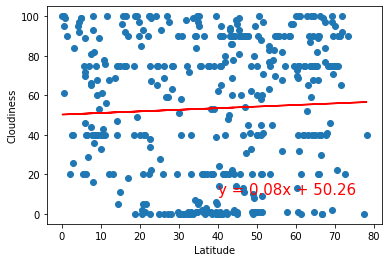

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


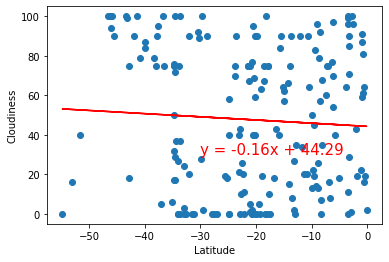

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


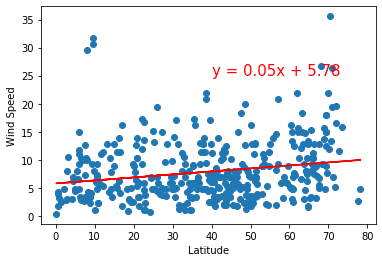

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


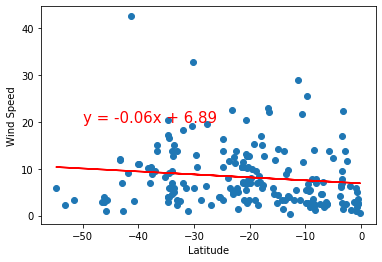